In [ ]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [2]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [3]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [4]:
grade = data.groupby('grade')

In [5]:
grade.agg(['count','mean','median','std'])['int_rate']

,count,mean,median,std
grade,,,,
A,433027,7.084545,7.24,0.984465
B,663557,10.675806,10.75,1.238302
C,650053,14.143689,13.99,1.251283
D,324424,18.143067,17.99,1.676964
E,135639,21.829653,21.48,2.703925
F,41800,25.454091,24.89,2.928144
G,12168,28.074255,28.18,2.804587


In [6]:
grade.agg(['count','mean','median','std','sum'])['loan_amnt']

,count,mean,median,std,sum
grade,,,,,
A,433027,14603.343210,12000.0,9107.975657,6.323642e+09
B,663557,14173.338199,12000.0,8957.012601,9.404818e+09
C,650053,15038.083318,13000.0,9203.950054,9.775551e+09
D,324424,15711.983007,14400.0,9250.612823,5.097344e+09
E,135639,17453.078392,16000.0,9363.276694,2.367318e+09
F,41800,19124.646531,18175.0,9166.366254,7.994102e+08
G,12168,20383.988741,19800.0,8994.472986,2.480324e+08


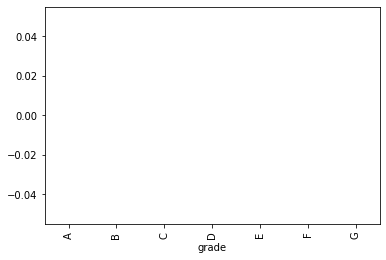

In [7]:
# loan issued amount breakout by grade
grade['loan_amnt'].sum().apply(lambda x: x/sum(data['loan_amnt'])).plot.bar()

In [8]:
# loan issued count breakout by grade
grade['loan_amnt'].count().apply(lambda x: x/#number of rows).plot.bar()

SyntaxError: unexpected EOF while parsing (<ipython-input-8-56a965f63ce4>, line 2)

In [ ]:
# interest rate and grade boxplot
data[['grade','int_rate']].boxplot(by='grade',column='int_rate')

In [9]:
# 33 rows seem to have missing values across the board- removing those for EDA
#data.isna().sum()

In [10]:
# dropping rows with chronic na issues
data = data.dropna(axis = 0, how = 'all', subset = ['issue_d'])

In [11]:
#convert date issued to date format
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#convert column from object to date
data['issue_d'] = pd.to_datetime(data['issue_d'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


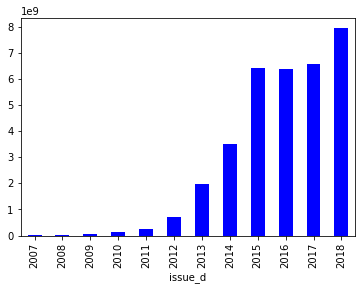

In [13]:
#loan issue amount by year
data.groupby(data.issue_d.dt.year).agg('sum')['loan_amnt'].plot.bar(color = 'b')

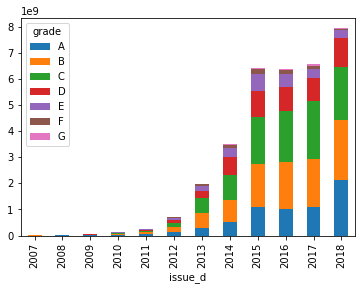

In [14]:
# sum of loan amounts issued by grade by year
data.groupby([data.issue_d.dt.year,'grade'])['loan_amnt'].sum().unstack('grade').plot(kind='bar',stacked = True)

In [15]:
# loan outcomes by percent/grade
status_group = data.loc[data.loan_status!='Current',:].groupby(['grade','loan_status'])['loan_status'].count()
status_group.groupby(level = 0).apply(lambda x: x/float(x.sum()))

grade  loan_status                                        
A      Charged Off                                            0.059797
       Default                                                0.000021
       Does not meet the credit policy. Status:Charged Off    0.000034
       Does not meet the credit policy. Status:Fully Paid     0.000379
       Fully Paid                                             0.930106
       In Grace Period                                        0.002661
       Late (16-30 days)                                      0.001436
       Late (31-120 days)                                     0.005567
B      Charged Off                                            0.131208
       Default                                                0.000017
       Does not meet the credit policy. Status:Charged Off    0.000212
       Does not meet the credit policy. Status:Fully Paid     0.000671
       Fully Paid                                             0.849042
       In Grace Pe

In [16]:

type(status_group.groupby(level = 0).apply(lambda x: x/float(x.sum())))

pandas.core.series.Series

In [17]:
# create ROI percent column
data['roi_dollar'] = data['total_pymnt'] - data['loan_amnt']
data['roi_percent'] = data['roi_dollar']/data['loan_amnt']
data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,821.723917,0.228257
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,Na

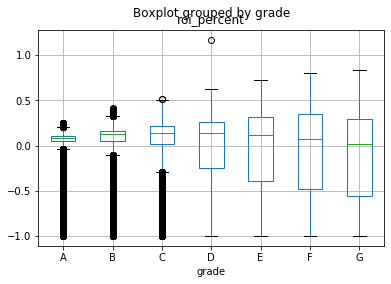

In [18]:
# ROI by class boxplot
data.loc[data.loan_status!='Current',:][['grade','roi_percent']].boxplot(by='grade',column='roi_percent')

In [19]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,821.723917,0.228257
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,Na

In [20]:
data['annual_inc'].describe()

count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [21]:
import seaborn as sns
data['annual_inc'] = data['annual_inc'].fillna(77992)
temp = data.drop(list(data[data['annual_inc']>10000000].index))



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0, 400000)

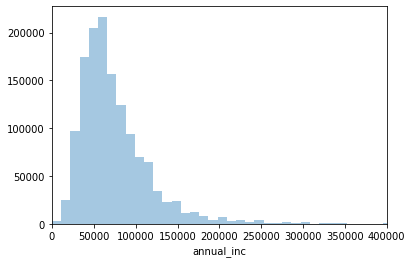

In [29]:
#distribution of salary data
sns.distplot(temp['annual_inc'], bins=1000, kde=False)
plt.xlim(0,400000)

In [24]:
#overview of income by loan grade
data.groupby('grade').describe()['annual_inc']

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,433027.0,89902.293113,90257.176644,0.0,53000.0,75000.0,106000.0,9573072.0
B,663557.0,78813.567867,171206.834156,0.0,47400.0,65000.0,94000.0,110000000.0
C,650053.0,74370.290585,72636.156459,0.0,45000.0,63000.0,90000.0,9930475.0
D,324424.0,71030.182415,68770.876079,0.0,42000.0,60000.0,85000.0,10999200.0
E,135639.0,71855.514982,63392.866932,0.0,44000.0,60000.0,85000.0,8500000.0
F,41800.0,72657.784855,49037.104820,0.0,45000.0,63000.0,87000.0,2500000.0
G,12168.0,75241.685705,51027.563924,0.0,46000.0,65000.0,90000.0,980000.0


In [25]:
temp = data[data.loan_status != 'Current']

(0, 400000)

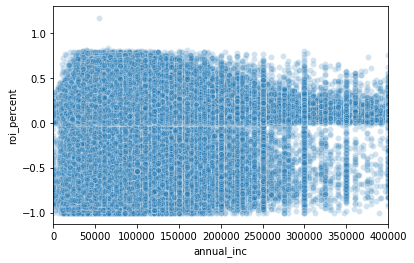

In [31]:
sns.scatterplot(x=temp['annual_inc'], y=temp['roi_percent'], alpha=.2)
plt.xlim(0,400000)

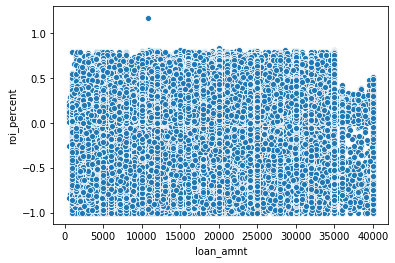

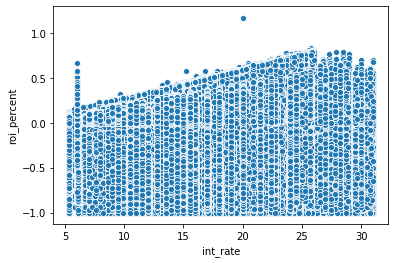

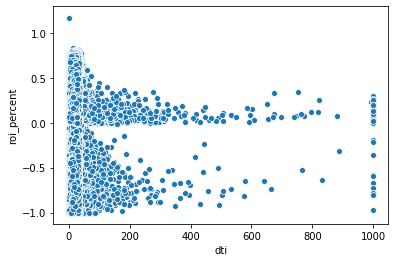

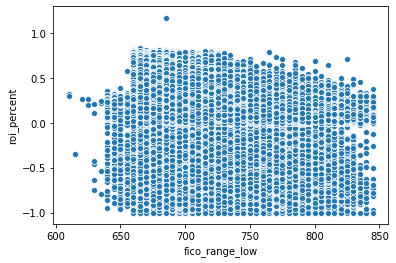

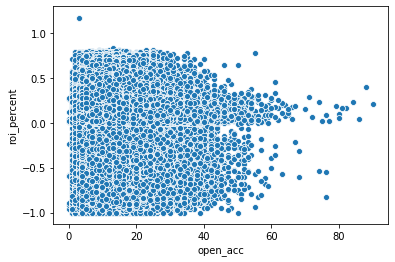

In [27]:
scatter_features = ['loan_amnt','int_rate','dti','fico_range_low', 'open_acc']


for feature in scatter_features:
    plt.figure()
    sns.scatterplot(x=feature, y='roi_percent', data=temp)


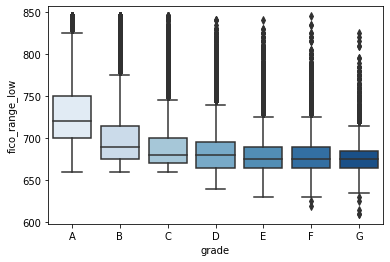

In [36]:
#boxplots comparing various features by loan grade
#order = temp.groupby('grade').median()['fico_range_low'].sort_values(ascending=False).index
order=['A','B','C','D','E','F','G']
sns.boxplot(x='grade', y='fico_range_low', data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))

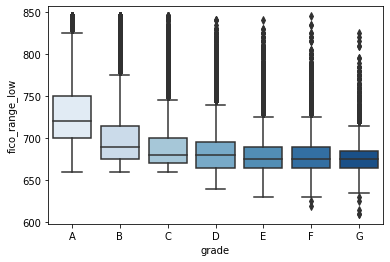

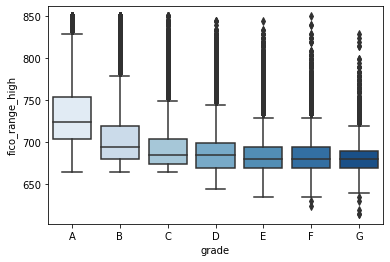

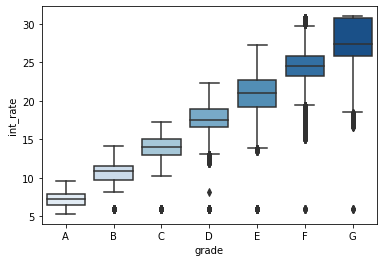

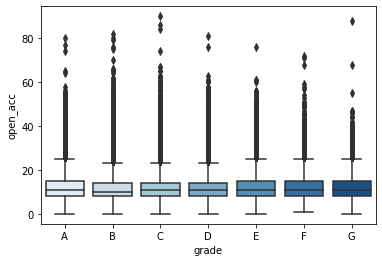

In [38]:
box_features = ['fico_range_low', 'fico_range_high', 'int_rate', 'open_acc']


for feature in box_features:
    plt.figure()
    sns.boxplot(x='grade', y=feature , data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))
   

(0, 250000)

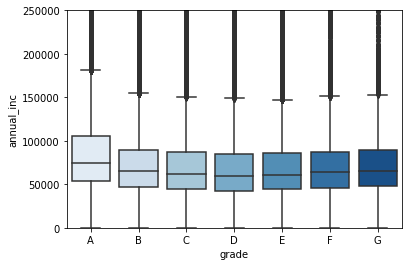

In [40]:
#income by loan grade

sns.boxplot(x='grade', y='annual_inc' , data=temp, 
            order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,250000)

(0, 250000)

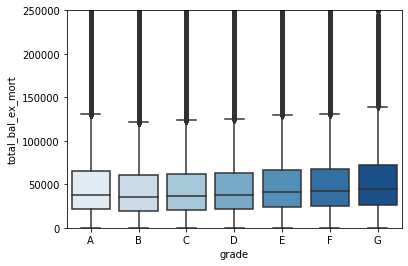

In [42]:
sns.boxplot(x='grade', y='total_bal_ex_mort' , data=temp, 
            order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,250000)


(0, 50)

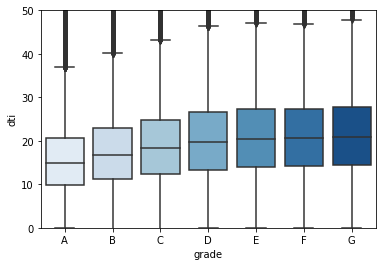

In [59]:
#Box plot dti by loan grade

sns.boxplot(x='grade', y='dti' , data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

### Subprime Loan EDA

In [45]:
#filtering for just the subprime loans

grades = ['D','E','F','G']

df = data[data['grade'].isin(grades)]

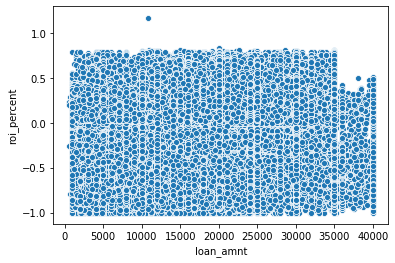

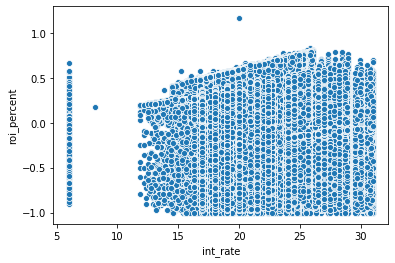

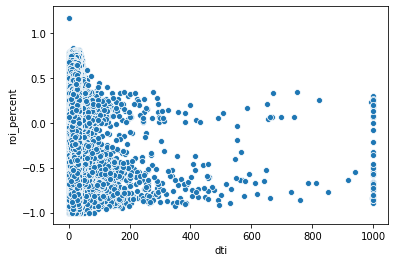

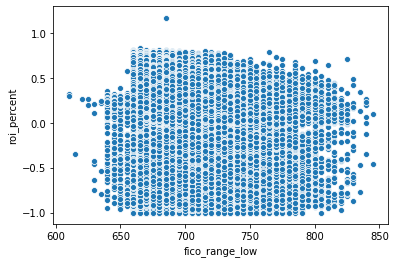

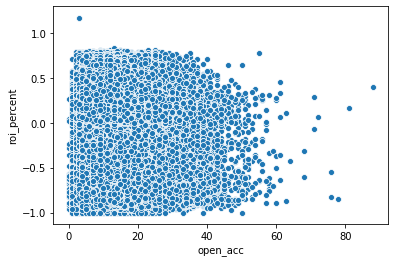

In [49]:
for feature in scatter_features:
    plt.figure()
    sns.scatterplot(x=feature, y='roi_percent', data=df)

<Figure size 432x288 with 0 Axes>

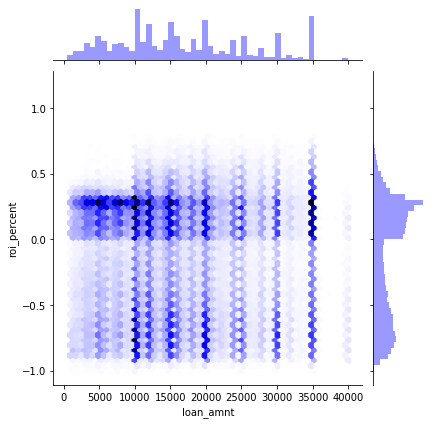

<Figure size 432x288 with 0 Axes>

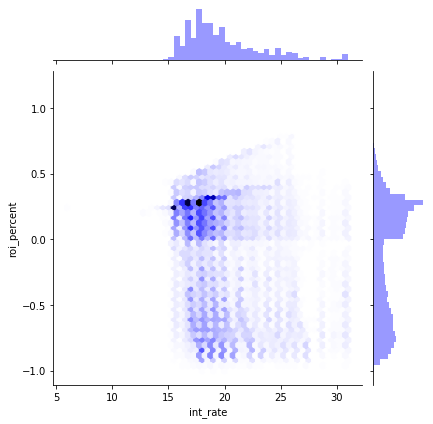

<Figure size 432x288 with 0 Axes>

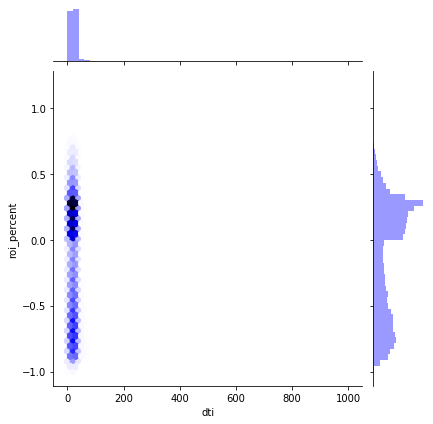

<Figure size 432x288 with 0 Axes>

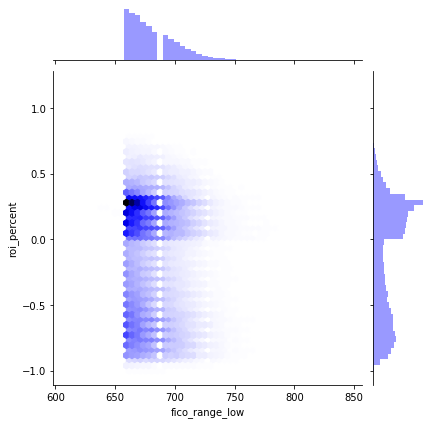

<Figure size 432x288 with 0 Axes>

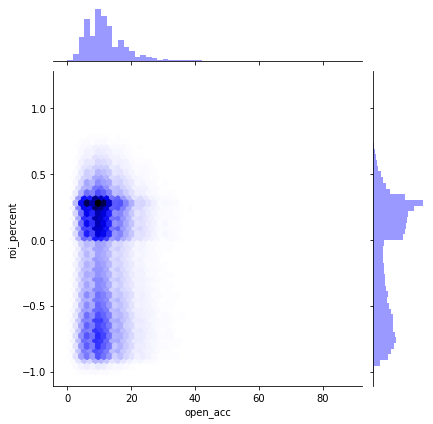

In [48]:
#jointplots for the scatter features to better visualize
for feature in scatter_features:
    plt.figure()
    sns.jointplot(x=feature, y='roi_percent',kind='hex', data=df, color='b')

In [50]:
df['dti'].describe()

count    513555.000000
mean         21.189589
std          15.544243
min           0.000000
25%          13.880000
50%          20.440000
75%          27.430000
max         999.000000
Name: dti, dtype: float64

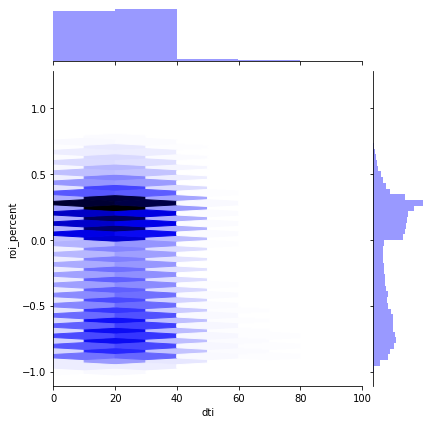

In [54]:
sns.jointplot(x='dti', y='roi_percent',kind='hex', data=df, color='b', xlim=(0,100))

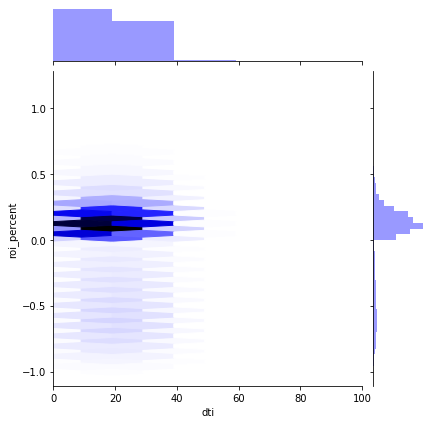

In [56]:
#comparing 
sns.jointplot(x='dti', y='roi_percent',kind='hex', data=temp, color='b', xlim=(0,100))

In [ ]:
#location